In [28]:
x1 <- -10:10
x2 <- 1 + 3 * x1


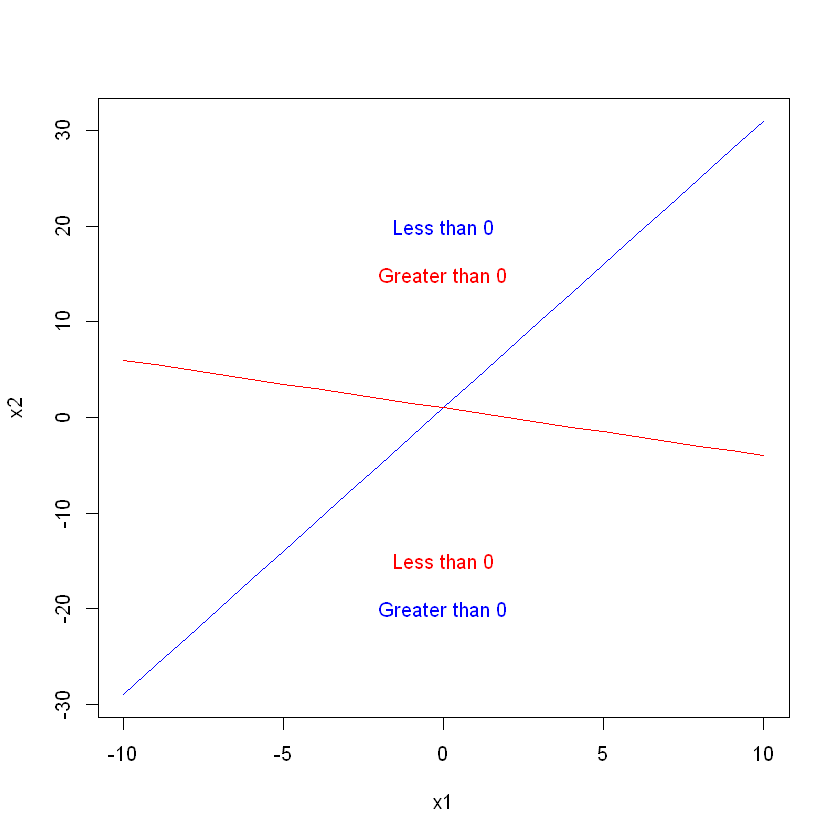

In [31]:
plot(x1, x2, type = "l", col = "blue")
text(c(0), c(-20), "Greater than 0", col = "blue")
text(c(0), c(20), "Less than 0", col = "blue")
lines(x1, 1 - x1/2, col = "red")
text(c(0), c(-15), "Less than 0", col = "red")
text(c(0), c(15), "Greater than 0", col = "red")


In [32]:
#2)

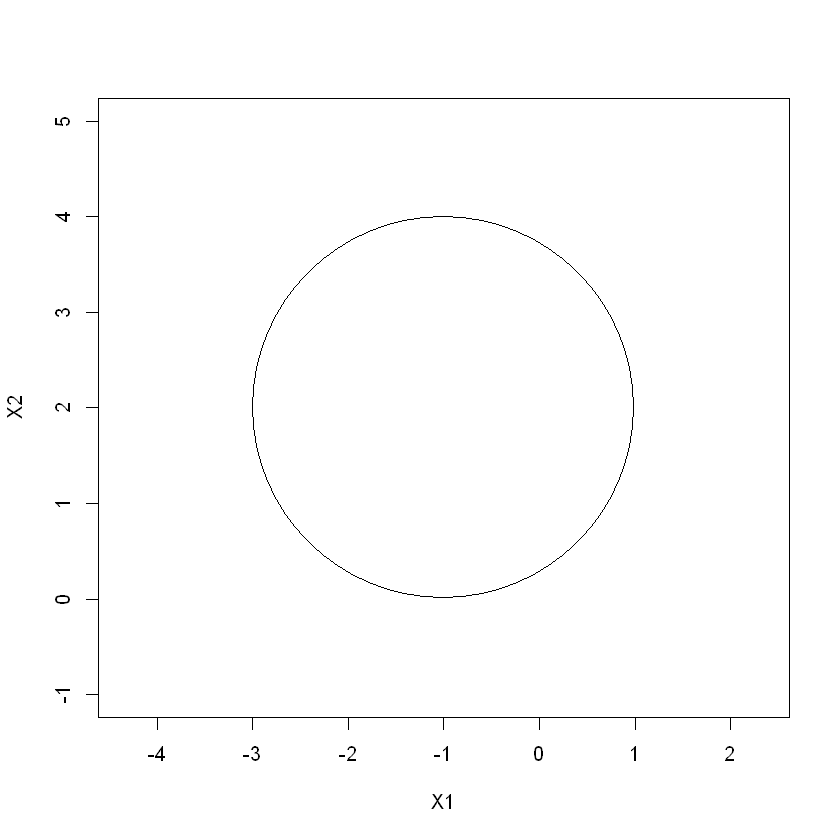

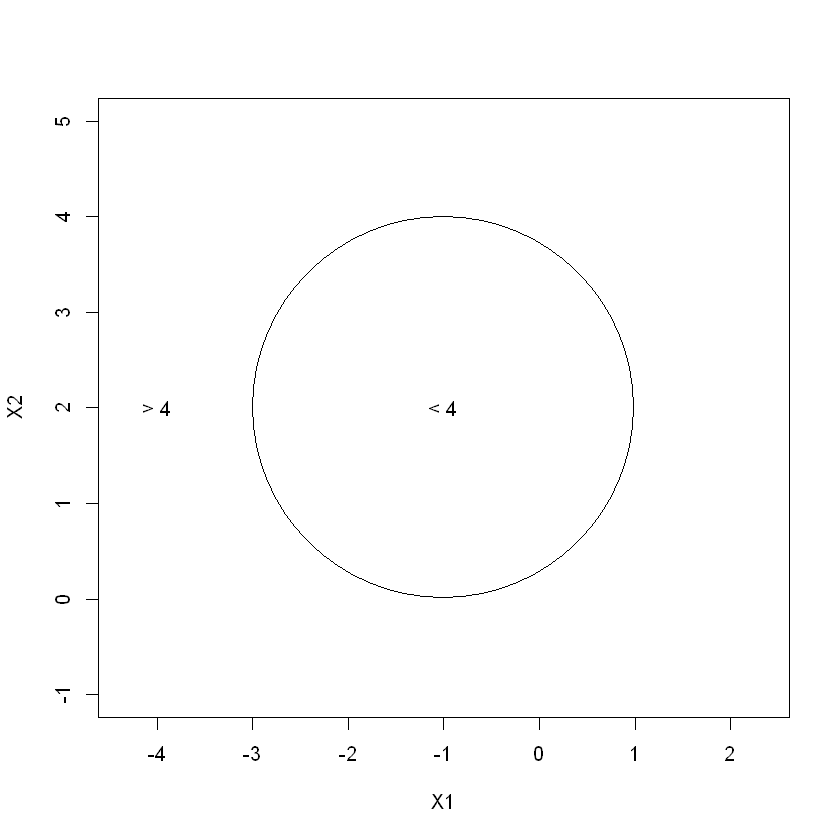

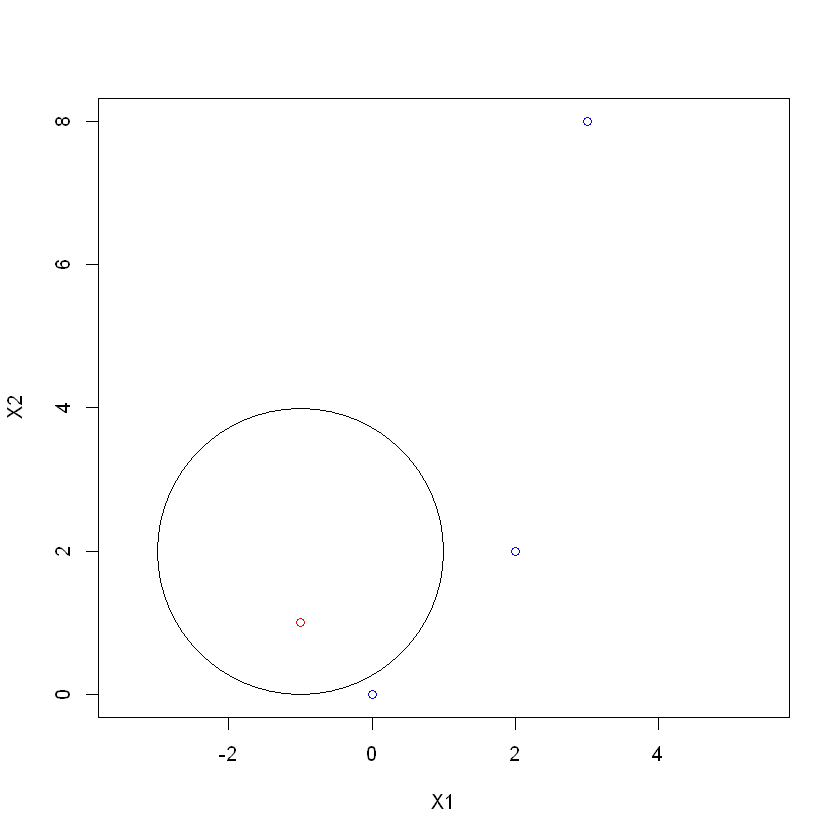

In [35]:
plot(NA, NA, type = "n", xlim = c(-4, 2), ylim = c(-1, 5), asp = 1, xlab = "X1", ylab = "X2")
symbols(c(-1), c(2), circles = c(2), add = TRUE, inches = FALSE)

#B)

plot(NA, NA, type = "n", xlim = c(-4, 2), ylim = c(-1, 5), asp = 1, xlab = "X1", ylab = "X2")
symbols(c(-1), c(2), circles = c(2), add = TRUE, inches = FALSE)
text(c(-1), c(2), "< 4")
text(c(-4), c(2), "> 4")

#c)

plot(c(0, -1, 2, 3), c(0, 1, 2, 8), col = c("blue", "red", "blue", "blue"), 
    type = "p", asp = 1, xlab = "X1", ylab = "X2")
symbols(c(-1), c(2), circles = c(2), add = TRUE, inches = FALSE)

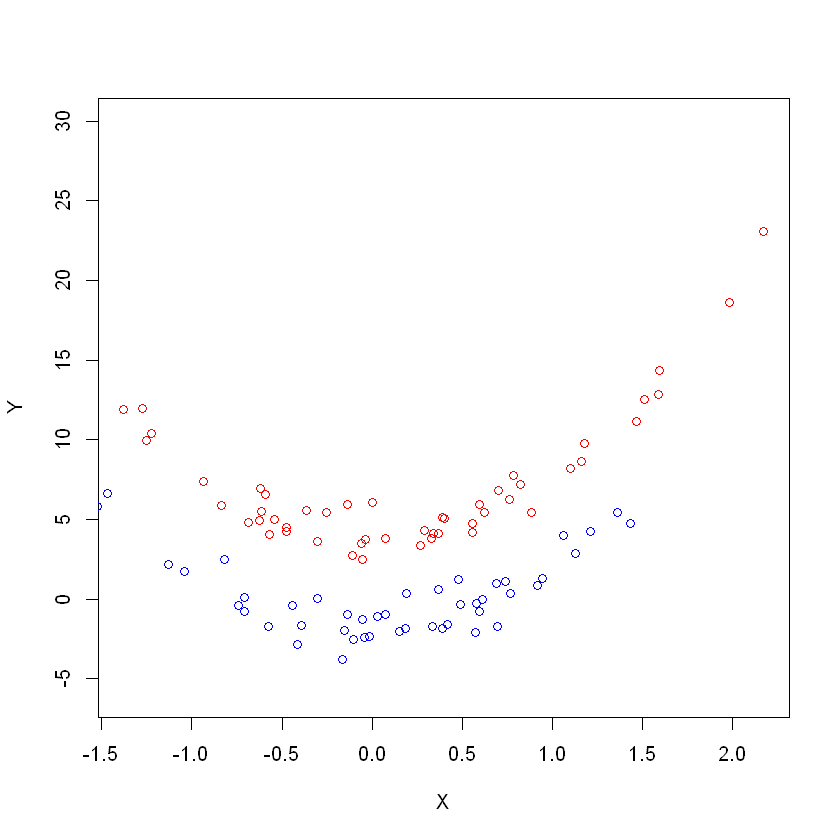

In [36]:
library(e1071)
set.seed(1)
x <- rnorm(100)
y <- 4 * x^2 + 1 + rnorm(100)
class <- sample(100, 50)
y[class] <- y[class] + 3
y[-class] <- y[-class] - 3
plot(x[class], y[class], col = "red", xlab = "X", ylab = "Y", ylim = c(-6, 30))
points(x[-class], y[-class], col = "blue")

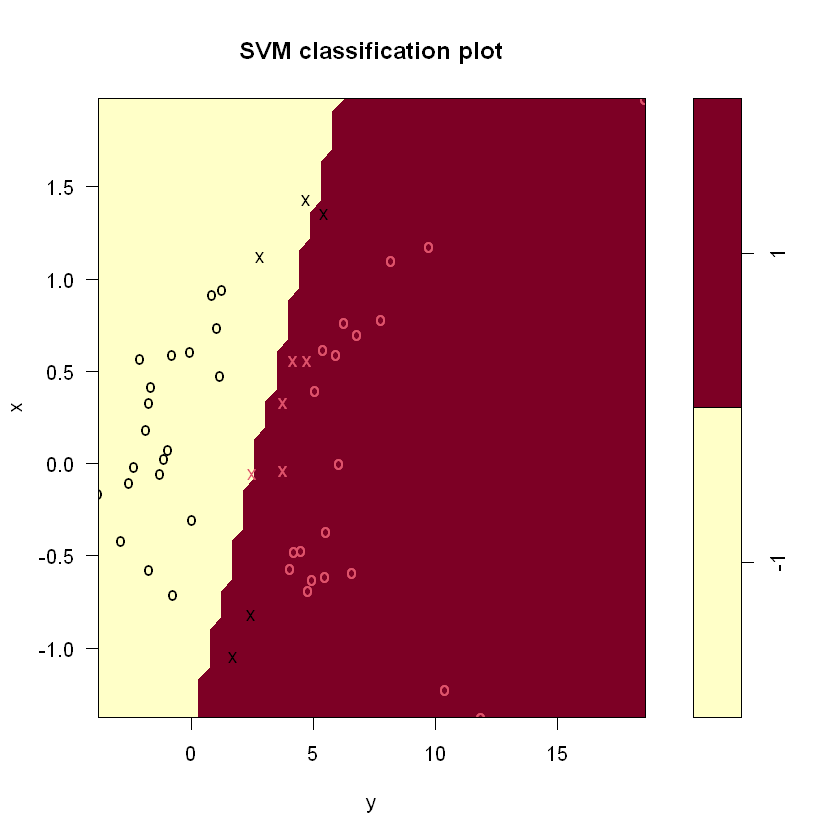

In [37]:
# fitting

z <- rep(-1, 100)
z[class] <- 1
data <- data.frame(x = x, y = y, z = as.factor(z))
train <- sample(100, 50)
data.train <- data[train, ]
data.test <- data[-train, ]
svm.linear <- svm(z ~ ., data = data.train, kernel = "linear", cost = 10)
plot(svm.linear, data.train)

In [38]:
table(predict = predict(svm.linear, data.train), truth = data.train$z)

       truth
predict -1  1
     -1 22  0
     1   3 25

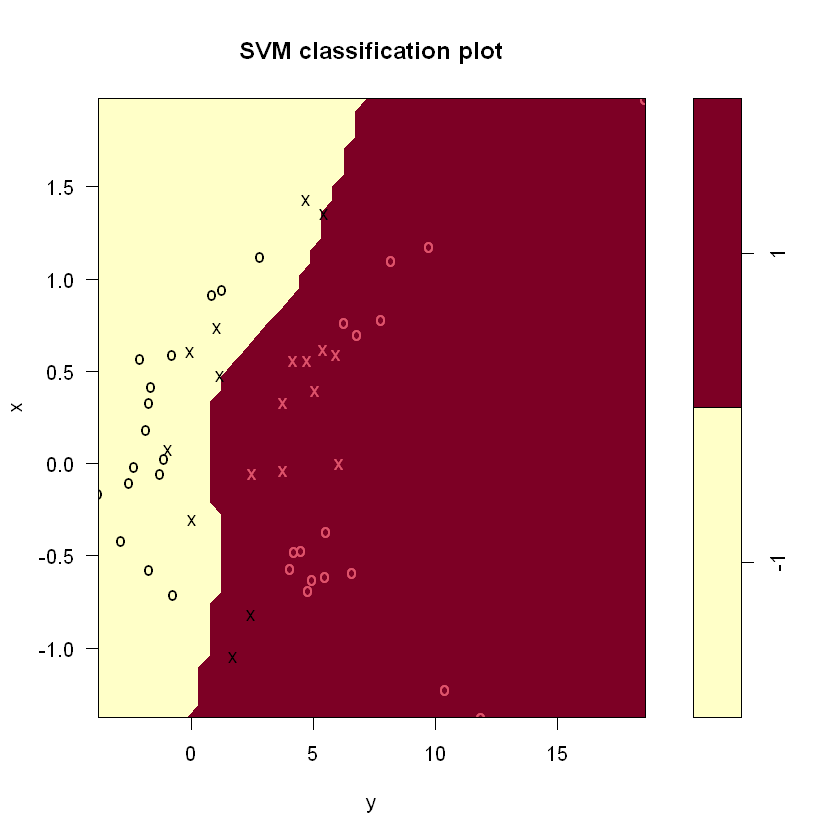

In [39]:
svm.poly <- svm(z ~ ., data = data.train, kernel = "polynomial", cost = 10)
plot(svm.poly, data.train)

In [40]:
table(predict = predict(svm.poly, data.train), truth = data.train$z)

       truth
predict -1  1
     -1 21  0
     1   4 25

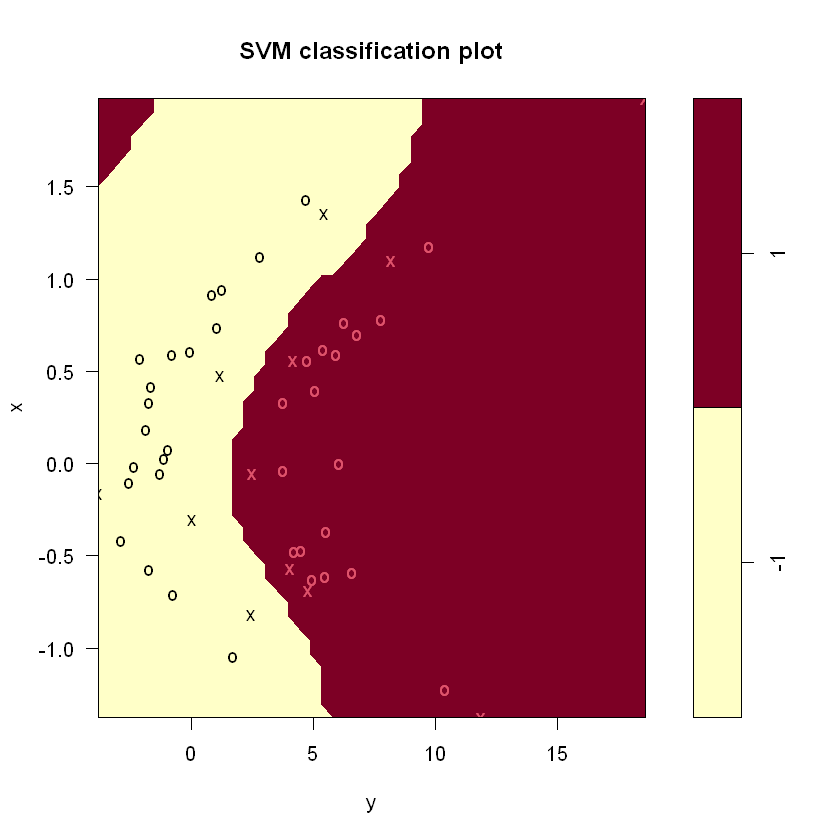

In [41]:
svm.radial <- svm(z ~ ., data = data.train, kernel = "radial", gamma = 1, cost = 10)
plot(svm.radial, data.train)

In [23]:

for (d in 1:10) {
    LR_for <- lm(nox ~ poly(dis, d=d), data=Boston, x=TRUE, y=TRUE)
    CV_for <- cv.lm(LR_for, k=5, seed=123)
    cross_validation$Degrees[d] <- d
    cross_validation$MSE[d] <- CV_for$MSE$mean
    
}
cross_validation <- data.frame(cross_validation)
cross_validation

Degrees,MSE
<int>,<dbl>
1,0.005530913
2,0.004075204
3,0.003861502
4,0.003883657
5,0.004081549
6,0.004881712
7,0.007391917
8,0.004582410
9,0.024055149


In [42]:
table(predict = predict(svm.radial, data.train), truth = data.train$z)

       truth
predict -1  1
     -1 25  0
     1   0 25

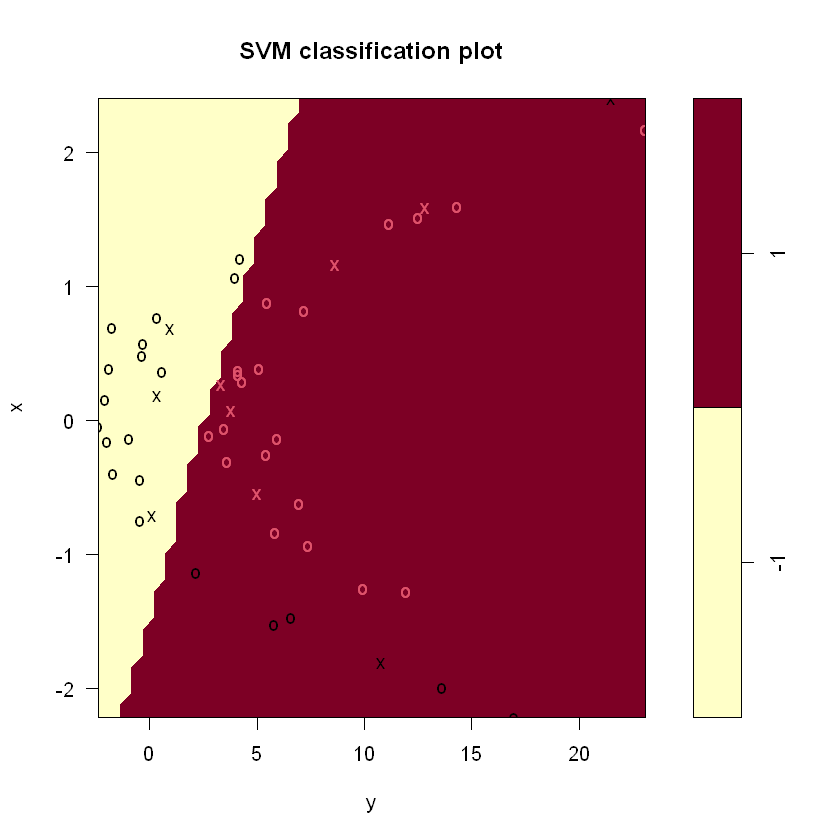

In [43]:
plot(svm.linear, data.test)

In [26]:
Spline_df <- NULL
for (d in 1:20) {
    spline_for <- lm(nox ~ bs(dis, df=d), data=Boston)
    RSS <- sum((predict(spline_for, newdata=Boston) - Boston$nox)^2)
    Spline_df$Dgrees[d]<-d
    Spline_df$RSS[d] <- RSS
    
}

Warning message in bs(dis, df = d):
"'df' was too small; have used 3"
Warning message in bs(dis, df = d):
"'df' was too small; have used 3"


In [44]:
#7)
library(ISLR)
var <- ifelse(Auto$mpg > median(Auto$mpg), 1, 0)
Auto$mpglevel <- as.factor(var)

In [45]:
#b)
set.seed(1)
tune.out <- tune(svm, mpglevel ~ ., data = Auto, kernel = "linear", ranges = list(cost = c(0.01, 0.1, 1, 5, 10, 100, 1000)))
summary(tune.out)



Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost
    1

- best performance: 0.01025641 

- Detailed performance results:
   cost      error dispersion
1 1e-02 0.07653846 0.03617137
2 1e-01 0.04596154 0.03378238
3 1e+00 0.01025641 0.01792836
4 5e+00 0.02051282 0.02648194
5 1e+01 0.02051282 0.02648194
6 1e+02 0.03076923 0.03151981
7 1e+03 0.03076923 0.03151981


In [46]:
#c)

tune.out <- tune(svm, mpglevel ~ ., data = Auto, kernel = "polynomial", ranges = list(cost = c(0.01, 0.1, 1, 5, 10, 100), degree = c(2, 3, 4)))
summary(tune.out)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost degree
  100      2

- best performance: 0.3060897 

- Detailed performance results:
    cost degree     error dispersion
1  1e-02      2 0.6019231 0.06346118
2  1e-01      2 0.6019231 0.06346118
3  1e+00      2 0.6019231 0.06346118
4  5e+00      2 0.6019231 0.06346118
5  1e+01      2 0.5841667 0.07806609
6  1e+02      2 0.3060897 0.07318010
7  1e-02      3 0.6019231 0.06346118
8  1e-01      3 0.6019231 0.06346118
9  1e+00      3 0.6019231 0.06346118
10 5e+00      3 0.6019231 0.06346118
11 1e+01      3 0.6019231 0.06346118
12 1e+02      3 0.3413462 0.14973473
13 1e-02      4 0.6019231 0.06346118
14 1e-01      4 0.6019231 0.06346118
15 1e+00      4 0.6019231 0.06346118
16 5e+00      4 0.6019231 0.06346118
17 1e+01      4 0.6019231 0.06346118
18 1e+02      4 0.6019231 0.06346118


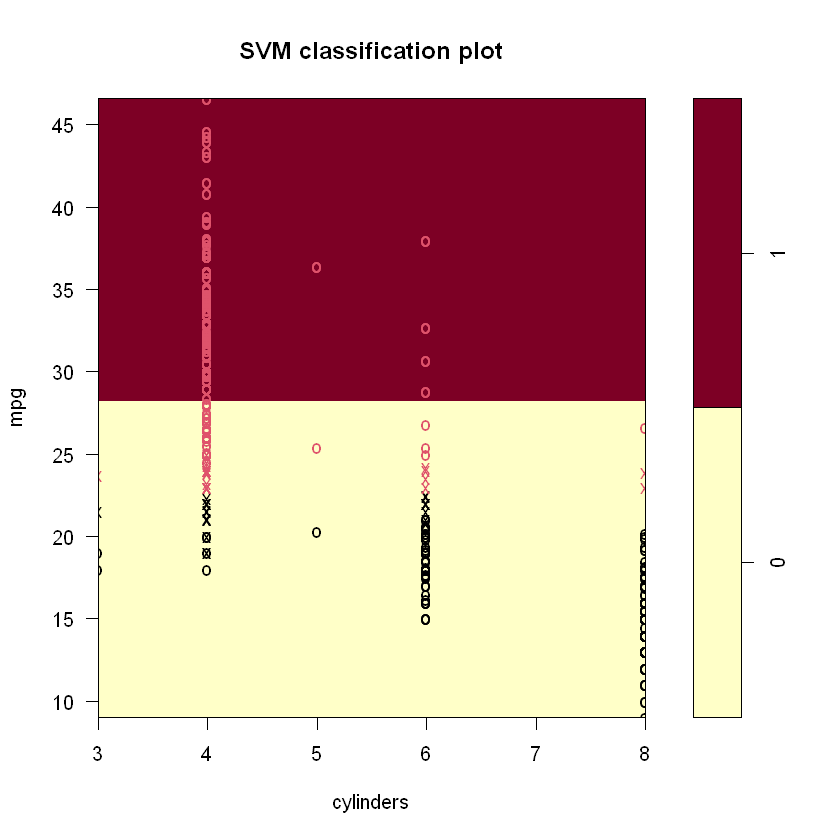

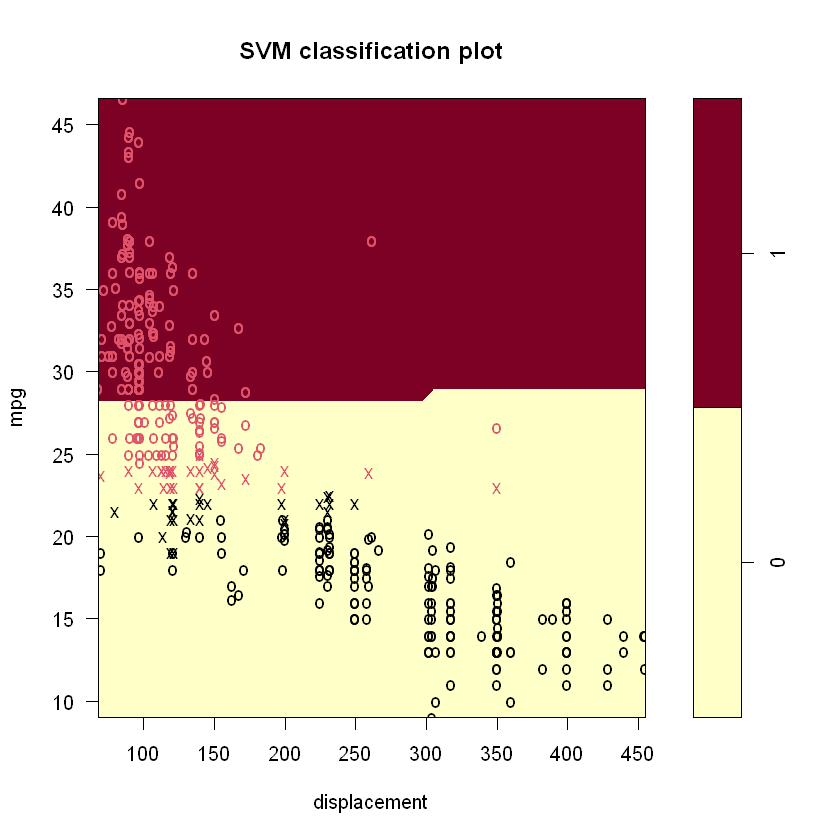

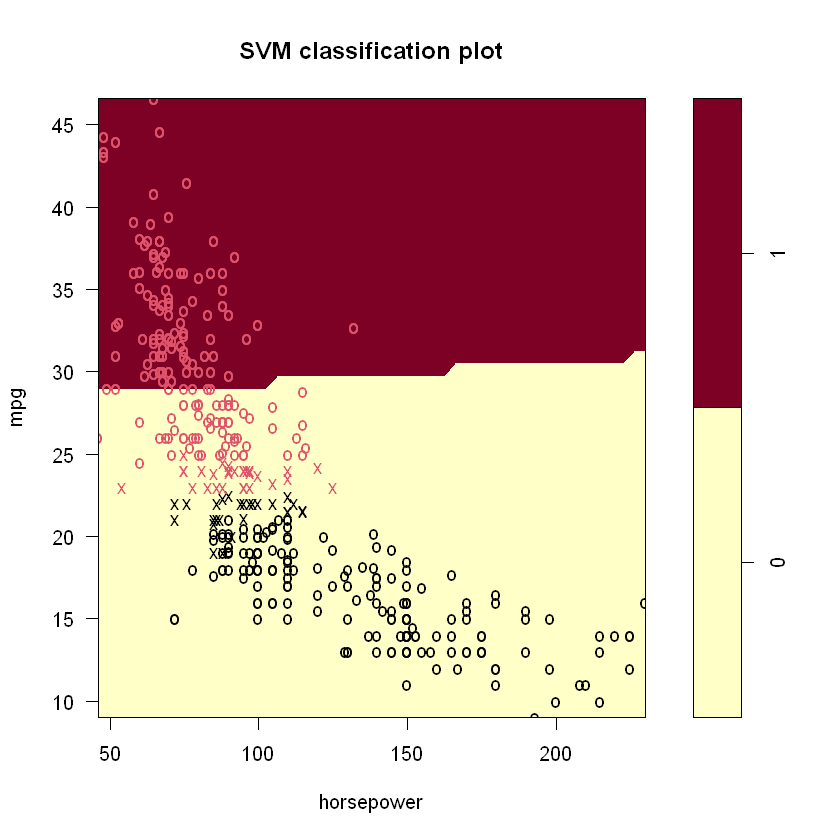

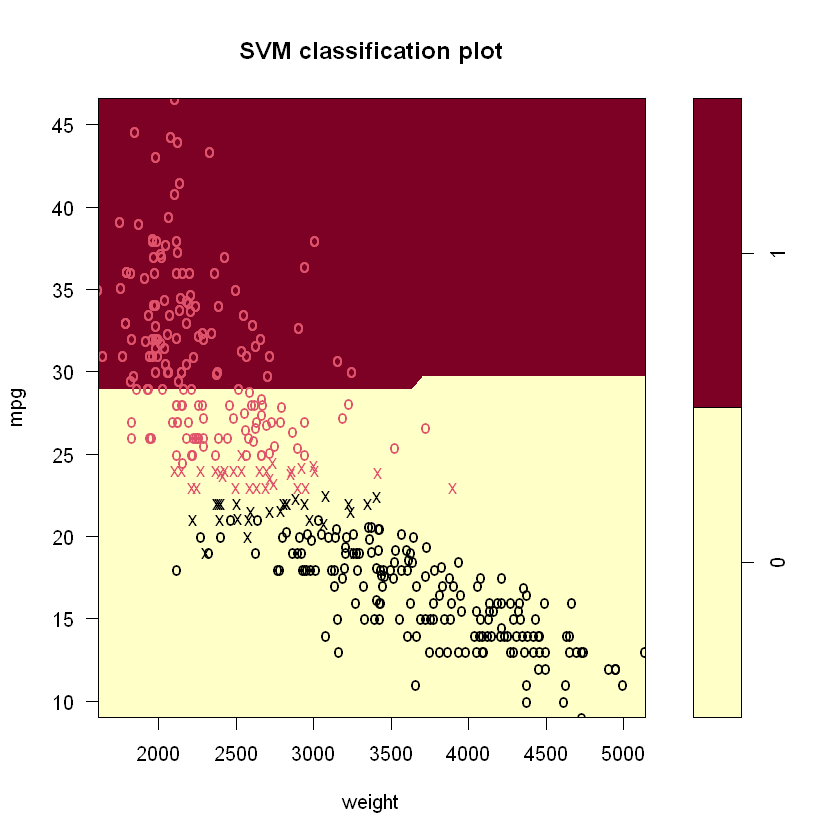

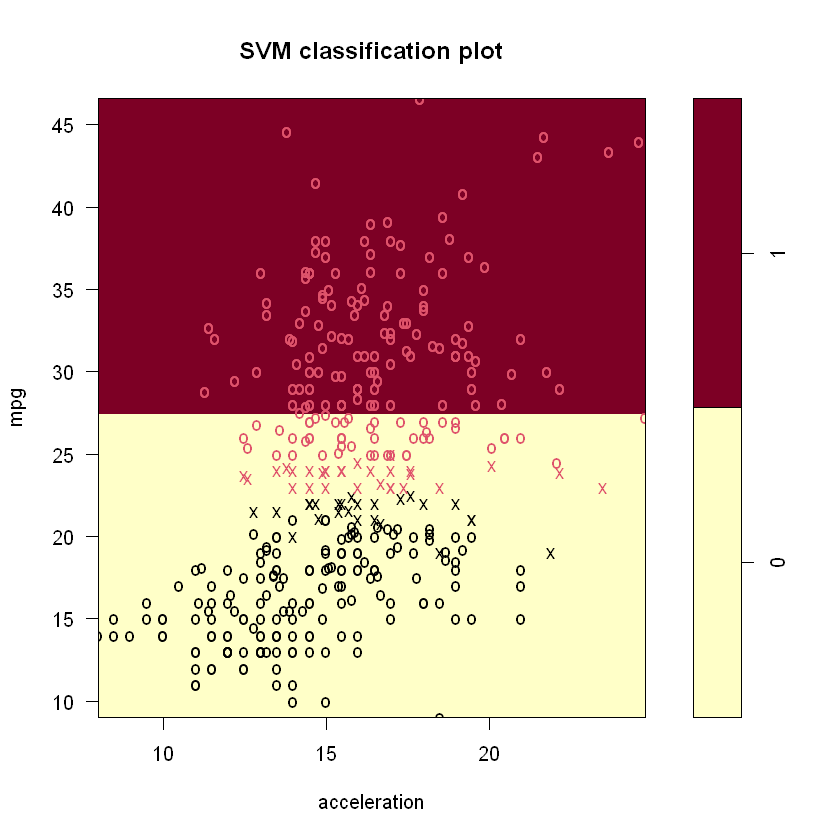

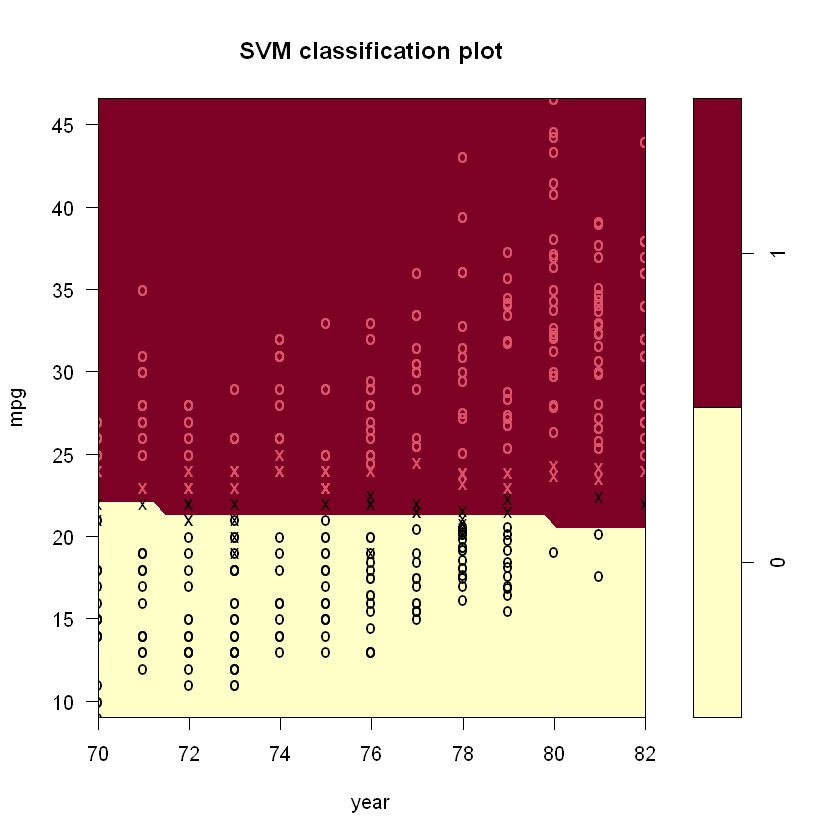

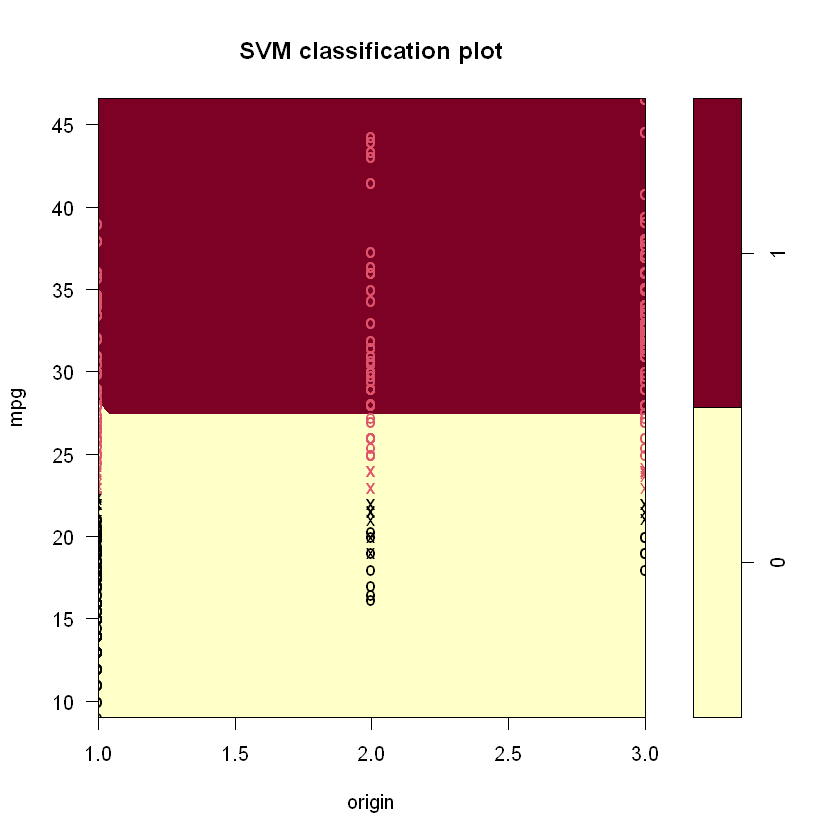

In [48]:
#D)

svm.linear <- svm(mpglevel ~ ., data = Auto, kernel = "linear", cost = 1)
svm.poly <- svm(mpglevel ~ ., data = Auto, kernel = "polynomial", cost = 100, degree = 2)
svm.radial <- svm(mpglevel ~ ., data = Auto, kernel = "radial", cost = 100, gamma = 0.01)
plotpairs = function(fit) {
    for (name in names(Auto)[!(names(Auto) %in% c("mpg", "mpglevel", "name"))]) {
        plot(fit, Auto, as.formula(paste("mpg~", name, sep = "")))
    }
}
plotpairs(svm.linear)